In [1]:
import numpy as np
import matplotlib as plt
import h5py

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [5]:
def zero_pad(X,pad):
    X_pad = np.pad(X, ((0,0), (pad,pad), (pad,pad), (0,0)), 'constant', constant_values = (0,0)) # should not be used elipsis
    return X_pad

In [6]:
np.random.seed(1)
x = np.random.randn(4,3,3,2)
x_pad = zero_pad(x, 2)

In [10]:
print ("x.shape =", x.shape)
print ("x_pad.shape =", x_pad.shape)
print ("x[1,1] =", x[1,1])
print ("x_pad[1,1] =", x_pad[1,1])

x.shape = (4, 3, 3, 2)
x_pad.shape = (4, 7, 7, 2)
x[1,1] = [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] = [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


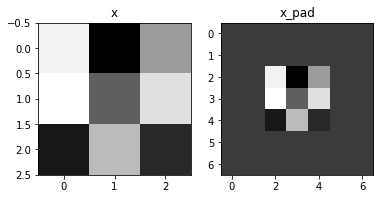

In [16]:
fig, axarr = plt.pyplot.subplots(1, 2) # using .pyplot required
axarr[0].set_title('x')
axarr[0].imshow(x[0,:,:,0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0,:,:,0])

In [34]:
def conv_single_step(a_slice_prev, W, b):
    """
    Apply one filter defined by parameters W on a single slice (a_slice_prev) of the output activation 
    of the previous layer.
    
    Arguments:
    a_slice_prev -- slice of input data of shape (f, f, n_C_prev)
    W -- Weight parameters contained in a window - matrix of shape (f, f, n_C_prev)
    b -- Bias parameters contained in a window - matrix of shape (1, 1, 1)
    
    Returns:
    Z -- a scalar value, result of convolving the sliding window (W, b) on a slice x of the input data
    """

    ### START CODE HERE ### (≈ 2 lines of code)
    # Element-wise product between a_slice_prev and W. Do not add the bias yet.
    s = np.multiply(a_slice_prev,W)
    # Sum over all entries of the volume s.
    z = np.sum(s)
    # Add bias b to Z. Cast b to a float() so that Z results in a scalar value.
    B = np.sum(b, dtype = float)
    Z = np.add(z,B)
    ### END CODE HERE ###

    return Z

In [35]:
np.random.seed(1)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z)

Z = -6.999089450680221


In [11]:
x = np.random.randn(2, 2, 2, 2)

In [12]:
x

array([[[[ 1.72886428, -0.83040099],
         [ 0.89404831, -0.20184078]],

        [[-0.19633265,  0.52269126],
         [ 0.29406181,  1.01237939]]],


       [[[ 0.528234  ,  0.61327981],
         [-1.33698051, -0.5696757 ]],

        [[-0.04512861, -0.3957144 ],
         [ 0.06217184, -0.49768339]]]])

In [17]:
np.pad(x, ((0,0),(1, 1), (0, 0),(0,0)), 'constant', constant_values=(0, 0))

array([[[[ 0.        ,  0.        ],
         [ 0.        ,  0.        ]],

        [[ 1.72886428, -0.83040099],
         [ 0.89404831, -0.20184078]],

        [[-0.19633265,  0.52269126],
         [ 0.29406181,  1.01237939]],

        [[ 0.        ,  0.        ],
         [ 0.        ,  0.        ]]],


       [[[ 0.        ,  0.        ],
         [ 0.        ,  0.        ]],

        [[ 0.528234  ,  0.61327981],
         [-1.33698051, -0.5696757 ]],

        [[-0.04512861, -0.3957144 ],
         [ 0.06217184, -0.49768339]],

        [[ 0.        ,  0.        ],
         [ 0.        ,  0.        ]]]])

In [27]:
x1 = np.arange(9.0).reshape((3, 3))
x2 = np.arange(9.0).reshape((3, 3))

In [28]:
x1

array([[0., 1., 2.],
       [3., 4., 5.],
       [6., 7., 8.]])

In [29]:
x2

array([[0., 1., 2.],
       [3., 4., 5.],
       [6., 7., 8.]])

In [30]:
np.add(x1,x2)

array([[ 0.,  2.,  4.],
       [ 6.,  8., 10.],
       [12., 14., 16.]])

In [25]:
np.sum(np.add(x1,x2))

45.0